# Predicción de Supervivencia en el Titanic

### Justificación de la Elección del Dataset

Se eligió el dataset del Titanic, titulado "Titanic - Machine Learning from Disaster", porque es un conjunto de datos ampliamente conocido y utilizado en la comunidad de aprendizaje automático. Este dataset presenta un desafío interesante y se presta a problemas de clasificación, ya que el objetivo es predecir si un pasajero sobrevivió o no al hundimiento del Titanic.

#### Descripción del problema a resolver

El problema principal que pretendemos resolver es predecir si un pasajero del Titanic sobrevivió o no, en función de características como la edad, el género, la clase de pasajero, el precio del boleto, entre otros. Esta es una tarea de clasificación binaria en la que el objetivo es proporcionar información valiosa que podría ayudar a comprender mejor los factores que influyeron en la supervivencia de los pasajeros.

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Cargar el dataset
df = pd.read_csv('./data/titanic_data.csv', index_col='PassengerId')


In [159]:
# Exploración inicial
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Descripción del Dataset:

El dataset del Titanic consta de las siguientes columnas:

**PassengerId:** Un número de identificación único para cada pasajero.
**Survived:** Una variable binaria que indica si el pasajero sobrevivió (1) o no (0).
**Pclass:** La clase del pasajero (1, 2 o 3).
**Name:** El nombre del pasajero.
**Sex:** El género del pasajero (masculino o femenino).
**Age:** La edad del pasajero.
**SibSp:** El número de hermanos/cónyuges a bordo.
**Parch:** El número de padres/hijos a bordo.
**Ticket:** El número de boleto.
**Fare:** El precio del boleto.
**Cabin:** El número de cabina.
**Embarked:** El puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).

In [160]:
# Resumen estadístico
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


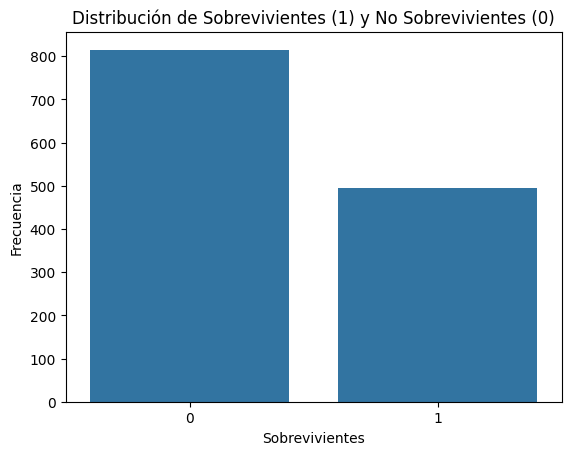

In [161]:
# Distribución de clases
sns.countplot(data=df, x='Survived')
plt.title('Distribución de Sobrevivientes (1) y No Sobrevivientes (0)')
plt.xlabel('Sobrevivientes')
plt.ylabel('Frecuencia')
plt.show()

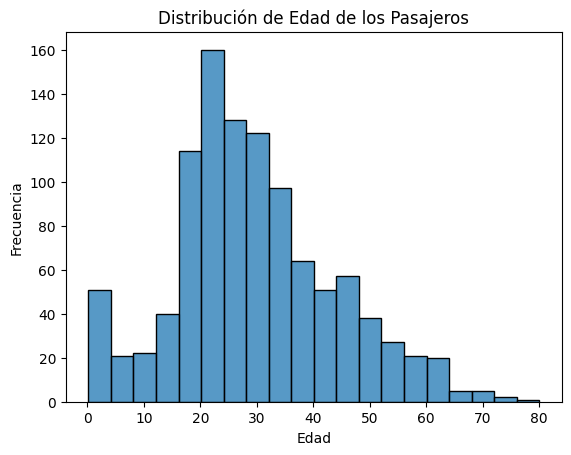

In [162]:
# Distribución de variables numéricas
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribución de Edad de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

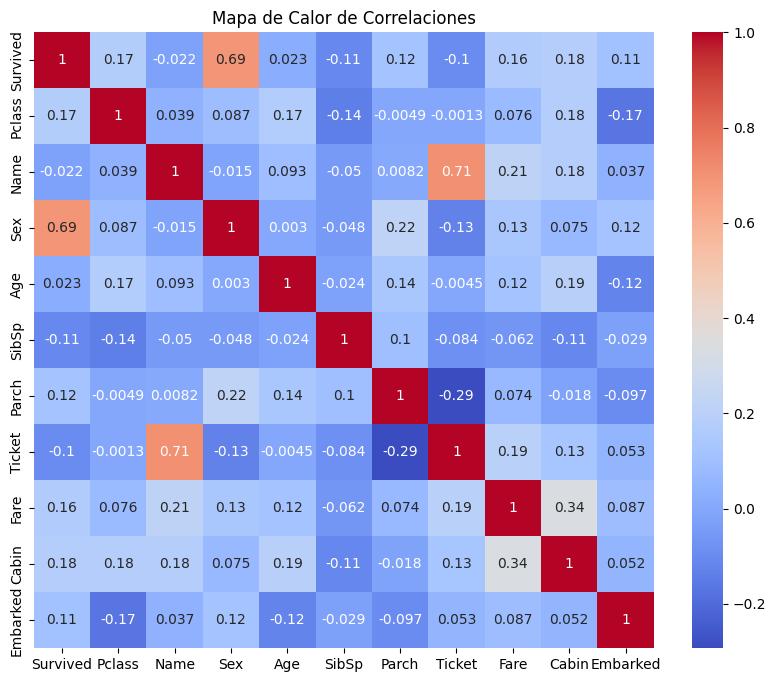

In [163]:
# Correlaciones
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [164]:
# Ver los valores nulos en cada columna
df.isnull().sum()


Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

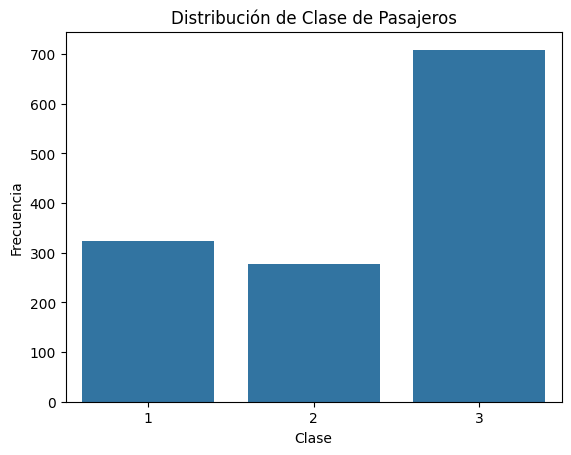

In [165]:
# Distribución de variables categóricas
sns.countplot(data=df, x='Pclass')
plt.title('Distribución de Clase de Pasajeros')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

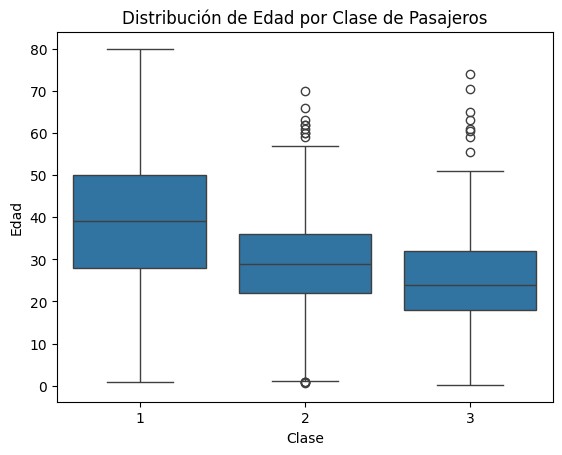

In [166]:
# Boxplots
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Distribución de Edad por Clase de Pasajeros')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()

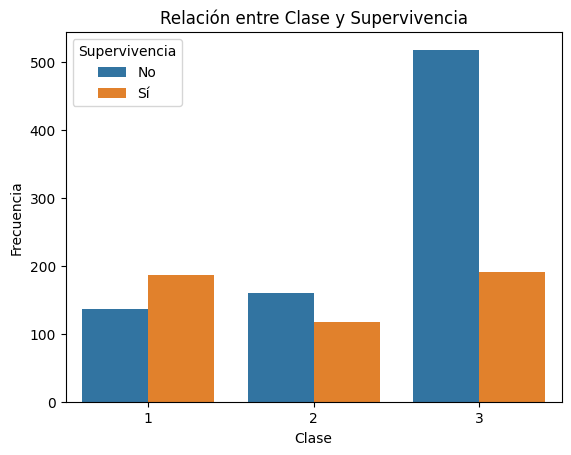

In [167]:
# Análisis de la relación entre Clase y Supervivencia
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Relación entre Clase y Supervivencia')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.legend(title='Supervivencia', labels=['No', 'Sí'])
plt.show()

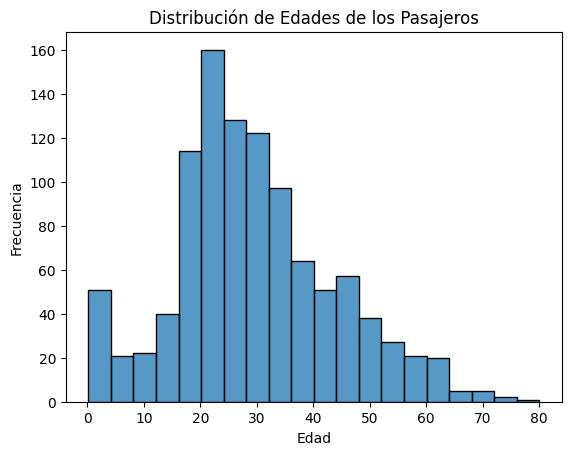

In [168]:
# Distribución de Edades de los Pasajeros
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

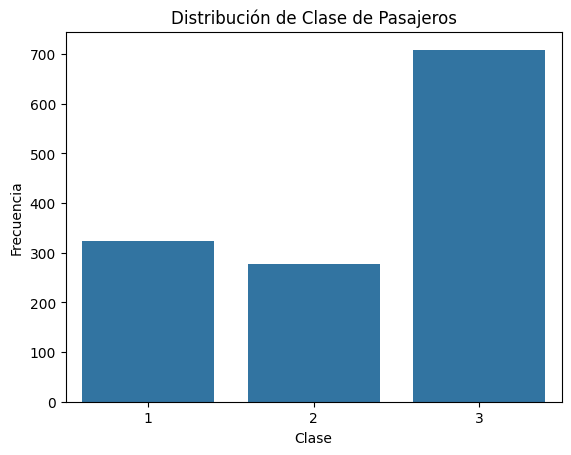

In [169]:
# Distribución de Clases de Pasajeros

sns.countplot(data=df, x='Pclass')
plt.title('Distribución de Clase de Pasajeros')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

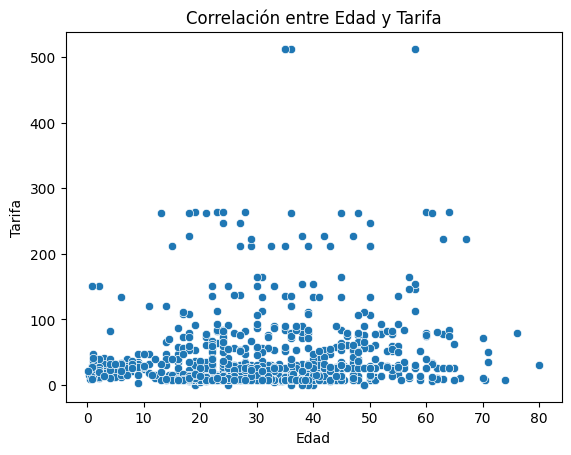

In [170]:
#Correlación entre Edad y Tarifa

sns.scatterplot(data=df, x='Age', y='Fare')
plt.title('Correlación entre Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

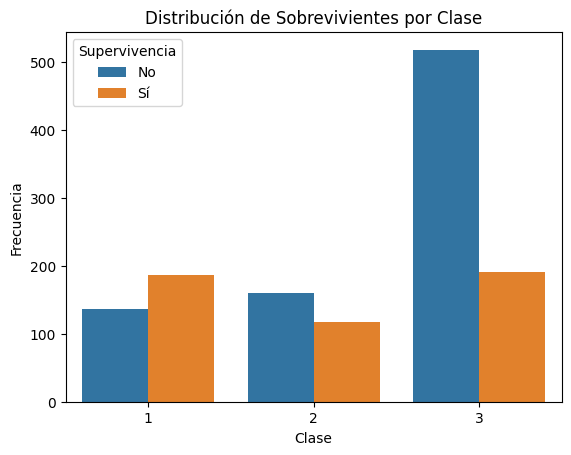

In [171]:
# Distribución de Supervivientes por Clase

sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Distribución de Sobrevivientes por Clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.legend(title='Supervivencia', labels=['No', 'Sí'])
plt.show()

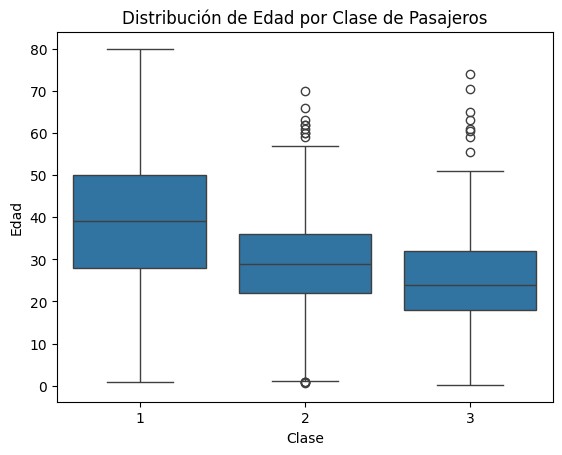

In [172]:
# Boxplot de Edades por Clase

sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Distribución de Edad por Clase de Pasajeros')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()

# Limpia el dataset

In [173]:
# Rellenar Valores Vacíos

df['Age'].fillna(df['Age'].median(), inplace=True)

In [174]:
# Codificación de Variables Categóricas: las variables categóricas como "Sex" o "Embarked", codificarlas en variables numéricas

df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [175]:
# Eliminar Columnas Innecesarias: algunas columnas no aportan información relevante 

df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [176]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,False,True,False,False,True
2,1,1,38.0,1,0,71.2833,True,False,True,False,False
3,1,3,26.0,0,0,7.9250,True,False,False,False,True
4,1,1,35.0,1,0,53.1000,True,False,False,False,True
5,0,3,35.0,0,0,8.0500,False,True,False,False,True


### Comentarios Finales

Este proyecto tiene como objetivo entrenar un modelo de aprendizaje automático que pueda predecir la supervivencia de los pasajeros del Titanic en función de las características proporcionadas en el dataset. La documentación y la comprensión del dataset son pasos cruciales para abordar con éxito esta tarea y comunicar los resultados a otras partes interesadas. A medida que avanzamos en el proyecto, registraremos nuestros hallazgos y resultados en este mismo notebook para mantener un registro claro de nuestro progreso.

In [177]:
df.to_csv("./data/processed_titanic.csv")